#__PRACTICAL SESSION 1__ Unsupervised & Supervised ML#

The dataset is the [_MIT-BIH Arrhythmia database_](https://physionet.org/content/mitdb/1.0.0/) composed of 10,000 [electrocardiograms (__ECG__)](https://en.wikipedia.org/wiki/Electrocardiography). Each ECG has 180 time samples and corresponds to a normal heart beat or 4 specific heart problem. Thus, we have 5 labels:

1.   'A': Atrial premature beat
2.   'L': Left bundle branch block beat
3.   'N': Normal beat
4.   'R': Right bundle branch block beat
5.   'V': Premature ventricular contraction

Data are available on eCAMPUS:


*   __X_tp1.npy__: a 10000x180 numpy matrix
*   __Y_tp1.npy__: a 10000 numpy vector with the associated labels (encoded by one character 'A', 'L', ...)

Download the dataset and put the numpy files into a '__/data__' directory.

First part is dedicated to UNSUPERVISED LEARNING with Principal Component Analysis (PCA) and Clustering (K-Means).

Second part is SUPERVISED LEARNING with _Logistic Regression_, _Naive Bayes Classifier_ and _Support Vector Machine_.

The goal of this practical session is to experiment! Everything you need is easily available in the SKLEARN documentation that contains many, many examples.  

#BONUS STRIKE 🎳

You can make additional experiences. In that case, please add bonus works at the end of your notebook in the __[BONUS]__ section.

Bonus works could bring bonus points on the global note for the practical sessions **_if and only if_** all the mandatory jobs have been done correctly.

#How this Jupyter Notebook works?

*   Questions and things to do are marked as __[QUESTION]__
*   When you have a comment or a answer to bring to a __[QUESTION]__ you have to use the __[ANSWER]__ field below.
*   When the answer of the __[QUESTION]__ is a code, you have a __[CODE]__ mention and you simply need to complete the code block below (that starts with _#Your code here_)



#Import basic libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#The Machine Learning library is SCIKIT-LEARN (SKLEARN), we will do targeted imports regarding our needs.

#Load data and process data [3 pts]

Data must be located in a ./data directory at the same level as this notebook

In [2]:
#IF YOU USE Google COLAB, you can mount your Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Create a data directory, put the numpy files and load. With Colab case, create 'data' here:
X=np.load("/content/drive/MyDrive/Colab Notebooks/IA ML/data/X_tp1.npy")
Y_raw=np.load("/content/drive/MyDrive/Colab Notebooks/IA ML/data/Y_tp1.npy")

__[QUESTION]__ What are the shapes of X and Y?

__[CODE]__

In [4]:
#Your code here
print(X.shape)
print(Y_raw.shape)


(10000, 180)
(10000,)


__[QUESTION]__ Plot a sample *x* from **X**

__[CODE]__

[-0.11  -0.105 -0.105 -0.11  -0.11  -0.115 -0.11  -0.115 -0.12  -0.155
 -0.215 -0.245 -0.23  -0.205 -0.165 -0.16  -0.17  -0.19  -0.175 -0.165
 -0.15  -0.135 -0.13  -0.135 -0.11  -0.11  -0.125 -0.14  -0.145 -0.12
 -0.105 -0.115 -0.155 -0.165 -0.165 -0.185 -0.185 -0.195 -0.205 -0.205
 -0.23  -0.23  -0.225 -0.22  -0.245 -0.26  -0.295 -0.3   -0.275 -0.27
 -0.285 -0.3   -0.315 -0.31  -0.32  -0.33  -0.375 -0.42  -0.4   -0.35
 -0.3   -0.255 -0.26  -0.27  -0.27  -0.28  -0.285 -0.295 -0.31  -0.315
 -0.31  -0.29  -0.275 -0.29  -0.295 -0.29  -0.28  -0.27  -0.25  -0.255
 -0.275 -0.29  -0.265 -0.205 -0.13   0.015  0.175  0.355  0.595  0.86
  1.12   1.27   1.27   1.04   0.64   0.175 -0.275 -0.685 -0.875 -0.84
 -0.68  -0.53  -0.42  -0.37  -0.345 -0.35  -0.335 -0.325 -0.325 -0.32
 -0.335 -0.345 -0.34  -0.335 -0.34  -0.35  -0.375 -0.38  -0.375 -0.35
 -0.355 -0.35  -0.37  -0.39  -0.37  -0.32  -0.285 -0.28  -0.285 -0.29
 -0.295 -0.275 -0.285 -0.25  -0.235 -0.21  -0.23  -0.195 -0.155 -0.16
 -0.185 -0.21  

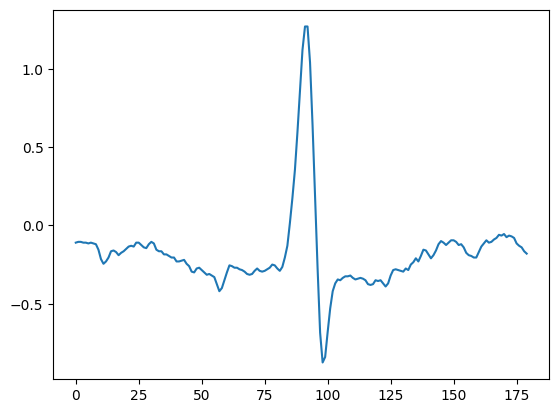

In [5]:
#Your code here
print(X[0])
plt.plot(X[0])


__[QUESTION]__ Check the Y values. For convenience, it's better to handle integer values for the names of the labels.
Use the scikit-learn tool [__LabelEncoder()__](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do that.

You must have this mapping: {'A': 0, 'L': 1, 'N': 2, 'R': 3,  'V': 4}

__[CODE]__

In [6]:
from sklearn.preprocessing import LabelEncoder
#Your code here
print(Y_raw)
Le=LabelEncoder()
Le.fit(Y_raw)
Le.transform(Y_raw)


['A' 'V' 'N' ... 'R' 'L' 'V']


array([0, 4, 2, ..., 3, 1, 4])

## Data visualization

__[QUESTION]__ Plot the average of the samples belonging to the label 0, 1, 2, 3 and 4.

*Option:* Additionally, you can plot the average ECG +/- the standard deviation using the [fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method from matplotlib (plt.fill_between(np.linspace(0,180,180), mean - std, mean + std))

__[CODE]__

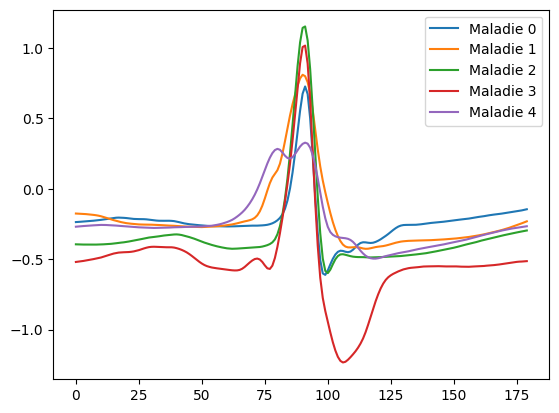

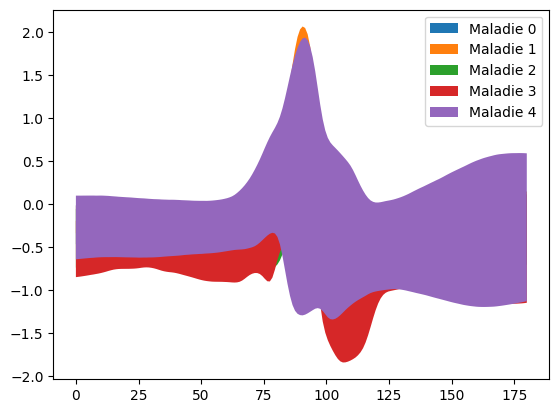

In [23]:
#Your code here
for i in range(5):
  moyenne_maladie=np.mean(X[Le.transform(Y_raw)==i],axis=0)
  plt.plot(moyenne_maladie,label=f'Maladie {i}')
plt.legend()
plt.show()

for i in range(5):
  moyenne_maladie=np.mean(X[Le.transform(Y_raw)==i],axis=0)
  std=np.std(X[Le.transform(Y_raw)==i],axis=0)
  plt.fill_between(np.linspace(0,180,180),moyenne_maladie-std,moyenne_maladie+std,label=f'Maladie {i}')
plt.legend()
plt.show()

## Data normalization

__[QUESTION]__ Why (in Machine Learning) is it usually a good thing to normalize a dataset?

__[ANSWER]__ *La normalisation des données permet de règler les problèmes d'échelle des données pour améliorer
 la qualité et la performance des modèles d'apprentissage .*



__[QUESTION]__ With the **preprocessing** environment from **sklearn** use the [**StandardScaler()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) to normalize your data. The scaled data will be noted **X_scaled**

__[CODE]__

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Your code here
X_scaled=StandardScaler()
X_scaled.fit(X)
print(X_scaled.fit(X))

StandardScaler()


#UNSUPERVISED LEARNING [15 pts]

## [Unsupervised] Principal Component Analysis (PCA) [5 pts]

For this part, we set in an UNSUPERVISED LEARNING context.

__[QUESTION]__ What does it mean in terms of learning objective?


__[ANSWER]__ le but est de découvrir les patterns et les relations entre les différentes donénes



__[QUESTION]__ Since we have 180 time samples per ECG, we are working in ℜ^180. We want to project our data in a new space with lower dimensions. For that, we experiment Principal Component Analysis.

1.    Use the [PCA](https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) method from sklearn and fit it to your data (**X_scaled**).     
2.    With the attribute *explained_variance_ratio_*  plot the cumulative plot (NB: cummulative sum with numpy is simply _cumsum()_). Add a legend for the X and Y axis.   

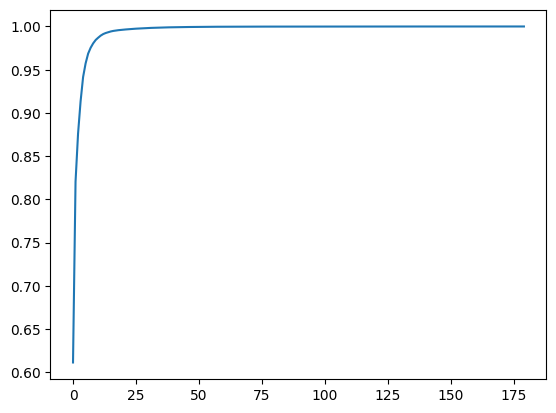

In [9]:
from sklearn.decomposition import PCA
#Your code here
X_scaled = X_scaled.transform(X)
Pca=PCA(n_components=180)
Pca.fit(X_scaled)
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.show()

##courbe permettant de comprendre quà partir de 25 dimensions
##on peut reconstruire sans problème la situation initiale


__[QUESTION]__ How many components do we need to keep 95% of the variance of the dataset? (below, we note this value **nb_comp**)



__[ANSWER]__ *fill here* + code below (you can use _np.where()_)



In [10]:
#Your code here

x_solution=np.where(np.cumsum(Pca.explained_variance_ratio_)>=0.95)[0][0]
print(x_solution)

5


__[QUESTION]__ Apply the PCA to project your data on a new space composed by **nb_comp** dimensions.

__[CODE]__

In [11]:
#Your code here
Pca=PCA(n_components=5)
Pca.fit(X_scaled)
X_projected = Pca.transform(X_scaled)
print(X_projected.shape)

(10000, 5)


__[QUESTION]__ Take a random sample _x_ from X_scaled. Plot the original _x_ and the one resulting from the PCA with **nb_comp**. Comment your result.

__NB__ Slides 128, 129 from course #1 is really important for this question

__[ANSWER]__ *Fill here*



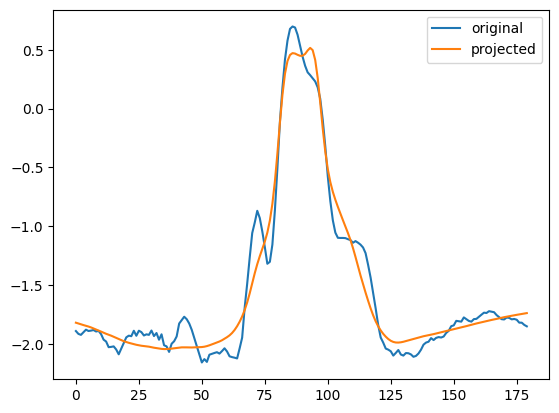

In [12]:
#Your code here
x_original=X_scaled[5]
x_reduction=Pca.inverse_transform(X_projected[5])
plt.plot(x_original,label='original')
plt.plot(x_reduction,label='projected')
plt.legend()
plt.show()

## [Unsupervised] Clustering (K-MEANS) [10 pts]

Now, we will perform data clustering on our dataset. We will cheat a little bit and fix **K=5** (i.e., the number of labels).

__[QUESTION]__ Why do I say that we are cheating by fixing K=5?


__[ANSWER]__ On triche en mettant en place K=5 car nous savons qu'ils ne existe que 5 maladies possibles



__[QUESTION]__ Use [Kmeans]() from sklearn with **K=5** and apply (fit) it to your projected data coming from PCA. Each sample belongs to a cluster represented by an id. So the outputs must be a vector of length 10,000 gathering the cluster id of each sample.

__[CODE]__

In [13]:
from sklearn.cluster import KMeans
np.random.seed(42)
#Your code here
KNN = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_scaled)
KNN.fit(X_projected)
Y_pred=KNN.predict(X_projected)
print(len(Y_pred))

10000


__[QUESTION]__ A (hard) question is: *how good is my clustering?* Obviously, since we cheat and know the labels and fix **K=5**, we expect to have all the samples from the label 'A' in one cluster, all the samples from label 'L' in another one, etc.

To measure how good is my clustering, we have several metrics. We will use the **homogeneity**, **completeness** and **v_measure**. The 3 metrics are implemented in the method [homogeneity_completeness_v_measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html) in sklearn.

Briefly explain what is measured by each metric?

__[ANSWER]__ **

*   Homogeneity


> Chaque cluster ne doit contenir que des données d'un seul label. Une valeur proche de 1 signifie un cluster ne mélangeant pas les autres classes


*   Completeness


>Tous les membres de chaque classe doivent se regrouper dans un seul cluster.

*   v_measure

>Combine l'homogénéité et la complétude. Calcul de moyenne harmonique entre les deux.

>Permet de ne priviligier aucune des 2 méthodes.

>Assurer une satisfaction des 2 méthodes de manières équilibrés.





__[QUESTION]__ Compute the metrics for your clustering. Comment.

In [14]:
from sklearn.metrics import homogeneity_completeness_v_measure
#Your code here
homogeneity_completeness_v_measure(Y_raw, Y_pred)


(0.20041529891896226, 0.22008454744282946, 0.20978990001936446)

__[COMMENT]__ Etant donné que les valeurs sont de 0.19, le modèle ne prédit pas correctement les différentes classes car les valeurs de mesure sont éloignées de 1



__[QUESTION]__ Project your original data (**X_scaled**) with a PCA with *n_components = 2*. then, apply again your KMeans on this 2-D dataset and compute the metrics.

In [15]:
#Your code here
Pca=PCA(n_components=2)
Pca.fit(X_scaled)
X_projected = Pca.transform(X_scaled)
from sklearn.cluster import KMeans
np.random.seed(42)
#Your code here
KNN = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_scaled)
KNN.fit(X_projected)
Y_pred=KNN.predict(X_projected)

__[QUESTION]__ Plot your 2-D dataset in a graph by labelling the data with the exact ECG label (i.e., your Y). Make a second plot by labelling the data with the id of the cluster. An easy way is to use the Matplotlib method [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) (use: marker='o',alpha=0.5,edgecolors='black')

Comment (i.e., does what you see with this 2-D representation explain your result with the previous metrics?).

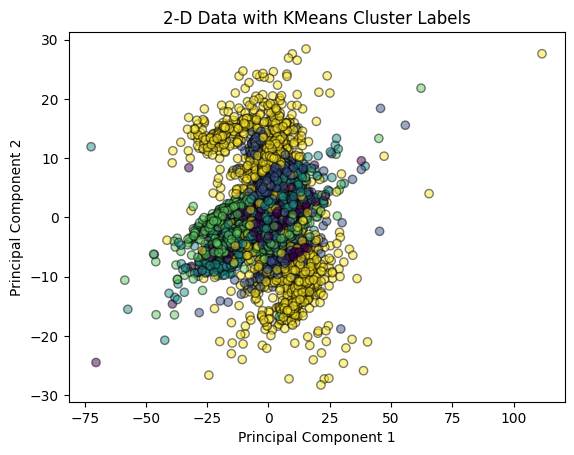

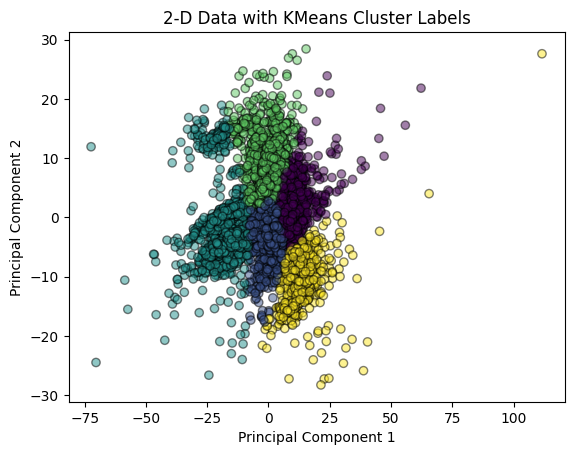

In [16]:
# Your code here
#ECG label=Le.transform(Y_raw)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Le.transform(Y_raw),
            marker='o',alpha=0.5,edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-D Data with KMeans Cluster Labels')
plt.show()

#ID_cluster=Y_pred
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y_pred,
            marker='o',alpha=0.5,edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-D Data with KMeans Cluster Labels')
plt.show()



__[COMMENT]__ *Les deux plots nous permmettent de mieux comprendre la repartitions des ECG dans les clusters. De nombreux ECG sont très mal classé notamment l'ensemble jaune et vert. Cette observation se retrouve dans les valeurs de mesure du modèle calculé précédemment.*



#SUPERVISED LEARNING [17 pts]

## [Supervised] Logistic Regression [5 pts]

Now, we set in a **SUPERVISED LEARNING** context and aim to perform a CLASSIFICATION TASK. We will build and train several **models**. After training, the goal of a **model** is to take a ECG input *x* and provide the probabilities that this *x* belongs to our 5 labels (*Y*).  

__[QUESTION]__ Formally, what is the learning goal of our models?

__[ANSWER]__ Le role du modèle est de comprendre la distribution des différents ECG en fonction du label Y. Le modèle apprend donc les relations entre les fetaures grace aux labels.



__[QUESTION]__ Before implementing supervised ML models, we need to split our dataset (X,Y) into a TRAIN (Xtrain, Ytrain) dataset and a TEST (Xtest, Ytest) dataset. Why ?  




__[ANSWER]__ Il est important de séparer les données d'entrainement et les données de test afin de ne pas tester le modèle avec des données surlequelles il s'est entrainé. Cette séparation entre les données d'entrainement et les données de test permet notamment d'éviter l'overfiting. Cela permet aussi de tester le modèle dans de vraies conditions, c'est à dire avec des données qu'il n'a jamais vues.



__[QUESTION]__ Use the SKLEARN method [train_test_split]() applied on your X_scaled dataset. Use test_size=0.30 and random_state=42. Check the size of the resulting (X_train, y_train, X_test, y_test).

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Le.transform(Y_raw), test_size=0.30, random_state=42)
#Your code here


__[QUESTION]__ The first model we will implement is a **LOGISTIC REGRESSION** model. Remember that this model is a very simple **LINEAR** model. You will use the [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) from SKLEARN.

1.  Define a LogisticRegression model
2.  Apply it to your training data (*fit* method)
3.  Compute the predictions on your test data (*prediction* method)
4.  Compute the accuracy on both the training and the test datasets (*score* method)
5.  Compute the [confusion_matrix](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html) on the test set
6.  [Display](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) your confusion matrix


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Your code here
#NB: you can set max_iter=10000 when you define your LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions=model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

0.833
0.8236666666666667
[[462  29  84  22   6]
 [ 17 513  41   0  33]
 [ 69  46 463   5  34]
 [ 34   3   7 536   1]
 [ 22  41  20  15 497]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## [Supervised] Gaussian Naive Bayes Classifier [4 pts]


__[QUESTION]__ The second model we will implement is a **GAUSSIAN NAIVE BAYES CLASSIFIER** model. You will use the [GaussianNB](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html) from SKLEARN.

Do exactly the same 6 steps seen before for the logistic regression.

__[QUESTION]__ What is the main difference - in terms of LEARNING OBJECTIVE - for the Gaussian Naive Bayes model?

__[ANSWER]__ Contrairement à la regression logistique, le GAUSSIAN NAIVE BAYES CLASSIFIER ne crée pas une frontière entre les classes. Il met en place une densité de probabilité afin de connaitre dans quelle classe de l'entrée.Il crée une distribution probalistique des données.



In [19]:
from sklearn.naive_bayes import GaussianNB
#Your code here
model = GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

0.5558571428571428
0.5506666666666666
[[467  39  48  36  13]
 [ 65 490  12   0  37]
 [200 215  68 118  16]
 [264  10   7 296   4]
 [ 65 136  20  43 331]]


## [Supervised] SVM [5 pts]



__[QUESTION]__ The third model we will implement is a **SUPPORT VECTOR MACHINE (SVM)** model. You will use [SVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from SKLEARN.

Do exactly the same 6 steps seen before two times:
1.   With the 'rbf' kernel (i.e., the Gaussian kernel. It's the default value of the *kernel* parameter)
2.   With the 'linear' kernel

In [20]:
from sklearn.svm import SVC

#Your code here
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

0.9284285714285714
0.918
[[515   2  82   1   3]
 [  1 585  10   0   8]
 [ 43   8 556   1   9]
 [ 33   1   7 539   1]
 [ 12  12   9   3 559]]
0.8995714285714286
0.876
[[487   7  96  10   3]
 [  8 566   9   0  21]
 [ 40  19 529   2  27]
 [ 36   0   5 539   1]
 [ 31  31  18   8 507]]


__[QUESTION]__ Comment the results you obtained with these models. [3 pts]

__[ANSWER]__ *Finalement voici les résultats de précision des différents modèles*
* SVM rbf=0.92
* SVM linear=0.89
* gaussian naives bayes=0.55
* logistic regression=0.82

Ainsi le meilleur modèle pour cette tache de classification est un SVM avec le 'rbf' kernel


# BONUS

In [21]:
#If you have additional experiences, put it here
#Bonus content will be evaluated IF AND ONLY IF you complete this practical session (all questions & codes)